# Petal Length Project
A project illustrating my ability to import a dataset and predict the type of flower based on the length and width.

In [82]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [83]:
#importing the .csv file into a pandas dataframe
iris = pd.read_csv("IRIS.csv")

### Exploratory Data Analysis

In [84]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  152 non-null    float64
 1   sepal_width   152 non-null    float64
 2   petal_length  152 non-null    object 
 3   petal_width   152 non-null    object 
 4   species       151 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.1+ KB


In [85]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [86]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length     object
petal_width      object
species          object
dtype: object

In [87]:
#Generating profile report to view summary statistics and basic EDA for all columns
ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
#petal_length & petal_width are categorical, but seem as if they should be numerical, so changing column data type
#there is one string in the petal_length column causing an error in the .to_numeric() method, diagnosing with 'coerce'
#of 152 observations, one 'A' petal_length observation seems to be an error in data collection, so choosing to drop this row
print(iris[pd.to_numeric(iris.petal_length, errors='coerce').isnull()])
iris = iris.drop(70)
iris["petal_length"] = pd.to_numeric(iris["petal_length"])

    sepal_length  sepal_width petal_length petal_width          species
70           6.2          2.2            A         1.5  Iris-versicolor


In [89]:
#in row 22, there is a similar error with petal_width, where it appears as if the species column got transcribed into the petal_width column
#since it is impossible to verify the accuracy of the rest of that observation, again dropping this row
print(iris[pd.to_numeric(iris.petal_width, errors='coerce').isnull()])
iris = iris.drop(22)
iris["petal_width"] = pd.to_numeric(iris["petal_width"])

    sepal_length  sepal_width  petal_length  petal_width species
22           3.7          1.5           0.4  Iris-setosa     NaN


In [90]:
#checking NaN values in the other columns
df1 = iris[iris.isna().any(axis=1)]
df1

,sepal_length,sepal_width,petal_length,petal_width,species


In [91]:
#re-generating profile report to see correlation with now-numeric columns
ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Visualization

In [92]:
%matplotlib inline

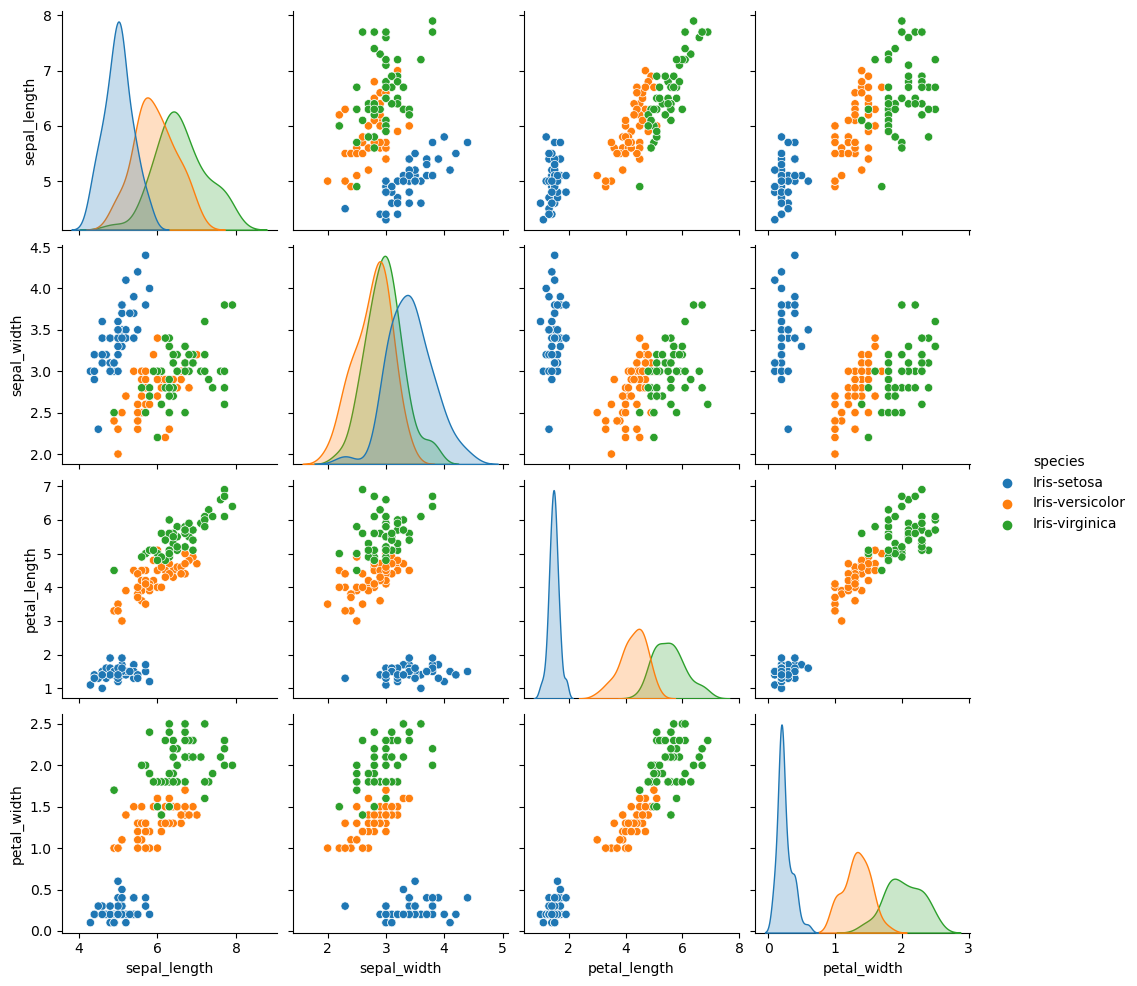

In [93]:
sns.pairplot(iris, hue="species")
plt.show()

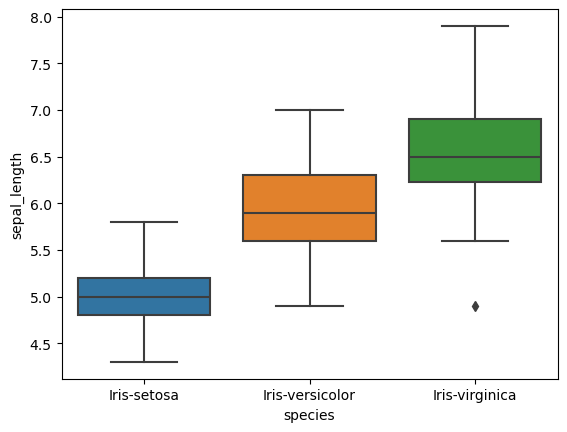

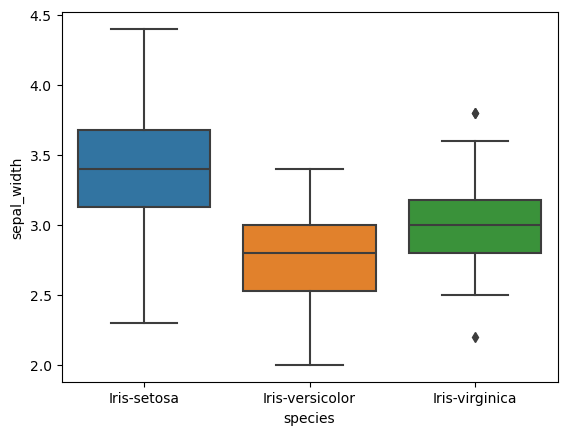

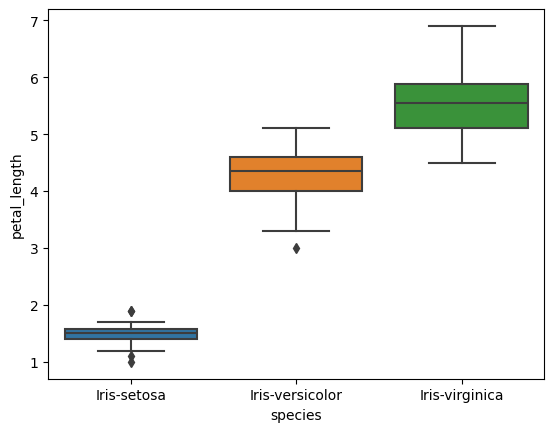

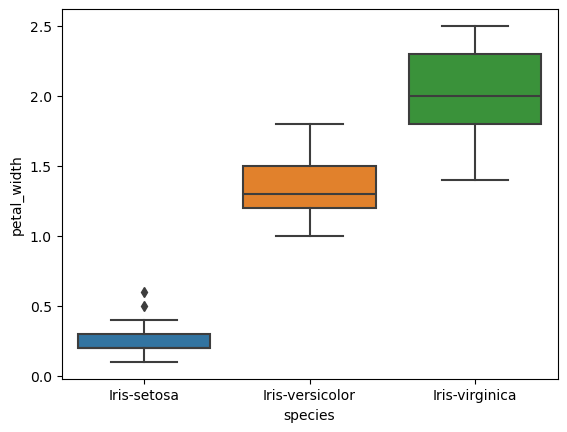

In [94]:
#creating box plot to compare distribution of species
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.show()

sns.boxplot(x='species', y='sepal_width', data=iris)
plt.show()

sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

sns.boxplot(x='species', y='petal_width', data=iris)
plt.show()

### Generating Summary Statistics
Technically, the Profile Report also shows all of these summary statistics, but just for clarity... 

In [95]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [96]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [97]:
iris.sepal_width.describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [98]:
iris.petal_length.describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [99]:
iris.petal_width.describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [100]:
iris.species.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

### Predicting the type of flower based on the length and width

In [138]:
#define features and target variable
X = iris.drop('species', axis=1)
y = iris['species']

#split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [139]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [140]:
#import libraries
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [141]:
#attempting a logistic regression first, as it tends to be a simple method of classification
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

log_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {log_accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.99
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



In [142]:
#next, I will use a random forest classification model to compare results
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {rf_accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.99
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      1.00      0.98        23
 Iris-virginica       1.00      0.96      0.98        23

       accuracy                           0.99        75
      macro avg       0.99      0.99      0.99        75
   weighted avg       0.99      0.99      0.99        75



In [143]:
#next, I will test a SVM model
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.96      0.96      0.96        23
 Iris-virginica       0.96      0.96      0.96        23

       accuracy                           0.97        75
      macro avg       0.97      0.97      0.97        75
   weighted avg       0.97      0.97      0.97        75



In [144]:
svm_model2 = SVC(kernel='linear', random_state=42)
scores = cross_val_score(svm_model2, X, y, cv=5)
print(f"SVM Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}")

SVM Cross-Validation Accuracy: 0.9800000000000001 ± 0.016329931618554516


In [145]:
#the final model I will test is a KNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        29
Iris-versicolor       0.88      1.00      0.94        23
 Iris-virginica       1.00      0.87      0.93        23

       accuracy                           0.96        75
      macro avg       0.96      0.96      0.96        75
   weighted avg       0.96      0.96      0.96        75



### Conclusions

Logistic Regression, the Random Forest Classifier, and the K-Nearest-Neighbors (KNN) model all had precision, recall, and f1 scores of 1.0 when I initially ran the models with a train/test split of 0.6/0.3, which leads me to a number of concerns: firstly being that the dataset/sample size is too small. With only 150 observations, and with highly correlated variables, it seems as if even the most basic models (logistic regression) are in danger of overfitting. 

As one attempt to validate the results, I added cross-validation to the SVM model, which had the lowest results, and got an accuracy of .98, which seems to indicate that the model performance itself is correct. 

My next step in troubleshooting the seeming overfitting was to reduce the train/test split--adjusting it to an even .5/.5 split. With this adjustment, the accuracy of the models also dropped, though only slightly, leading me to return to my first concern that the small number of observations is preventing the models from appropriately generalizing (and thereby reducing overfitting).

All of that being said, with the data provided, any of the classification models tested seem to be valid options for accurately predicting the species of flower based on it's length and width. Were I to choose just one, I would choose logistic regression, due to its simplicity and interpretability. 

In [155]:
#some double-checking that y contains all of the species appropriately
y.describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [156]:
y.info()

<class 'pandas.core.series.Series'>
Index: 150 entries, 0 to 151
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


<Axes: xlabel='Species', ylabel='Count'>

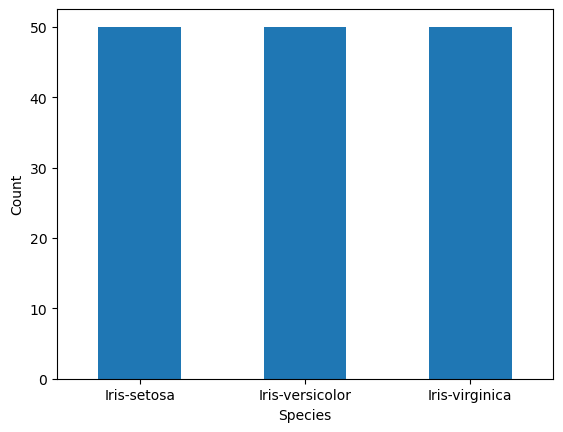

In [157]:
y.value_counts().plot(kind='bar', xlabel='Species', ylabel='Count', rot=0)